# Recreate Figure 5

The purpose of this notebook is to combine all the digital gene expression data for the retina cells, downloaded from the Gene Expression Omnibus using the accession number [GSE63473](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE63473).

In [1]:
import os
import common

# Assign notebook and folder names
notebook_name = '08_recreate_figure_5'
figure_folder = os.path.join(common.FIGURE_FOLDER, notebook_name)
data_folder = os.path.join(common.DATA_FOLDER, notebook_name)
print('Figure folder:', figure_folder)
print('Data folder:', data_folder)

# Make the folders 
! mkdir -p $figure_folder
! mkdir -p $data_folder

Figure folder: figures/08_recreate_figure_5
Data folder: data/08_recreate_figure_5


In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [7]:
import macosko2015

urlname = macosko2015.BASE_URL + '/amacrine_expression.csv'
urlname

AttributeError: module 'macosko2015' has no attribute 'BASE_URL'

In [6]:
expression = pd.read_csv()
expression.head()

,1700025G04RIK,2610017I09RIK,2900011O08RIK,4833424O15RIK,4930447C04RIK,6330403K07RIK,6430548M08RIK,8430419L09RIK,A030009H04RIK,A830010M20RIK,...,YWHAG,YWHAH,ZCCHC12,ZCCHC18,ZEB2,ZFHX3,ZFP804A,ZMAT4,ZWINT,ZYX
r1_GGGTGTCAGTGG,1,0,23,4,3,7,10,4,3,4,...,7,4,0,5,2,7,0,3,6,0
r1_GTTTATATGCGC,5,0,9,3,1,4,4,6,9,4,...,3,5,1,8,11,4,2,3,8,0
r1_TCTTCACTGGCT,5,0,6,0,4,5,7,0,3,9,...,7,5,1,4,3,0,3,3,11,2
r1_TCATTTAGTCGA,2,1,14,16,0,8,0,0,3,0,...,11,4,1,5,13,0,0,0,6,0
r1_GTCTATTCGGTT,0,0,11,19,0,2,13,2,1,1,...,2,10,1,2,1,0,1,2,1,0


In [4]:
csv = os.path.join(common.DATA_FOLDER, '03_clean_cluster_assignments', 
                             'cluster_names.csv')
cluster_names = pd.read_csv(csv, index_col=0, squeeze=True)
cluster_names.head()

cell
r1_GGCCGCAGTCCG    cluster_02
r1_CTTGTGCGGGAA    cluster_02
r1_GCGCAACTGCTC    cluster_02
r1_GATTGGGAGGCA    cluster_02
r1_GTGCCGCCTCTC    cluster_25
Name: cluster_id, dtype: object

In [5]:
expression, cells, genes = macosko2015.load_amacrine('pandas')

expression.head()

,1700025G04RIK,2610017I09RIK,2900011O08RIK,4833424O15RIK,4930447C04RIK,6330403K07RIK,6430548M08RIK,8430419L09RIK,A030009H04RIK,A830010M20RIK,...,YWHAG,YWHAH,ZCCHC12,ZCCHC18,ZEB2,ZFHX3,ZFP804A,ZMAT4,ZWINT,ZYX
r1_GGGTGTCAGTGG,1,0,23,4,3,7,10,4,3,4,...,7,4,0,5,2,7,0,3,6,0
r1_GTTTATATGCGC,5,0,9,3,1,4,4,6,9,4,...,3,5,1,8,11,4,2,3,8,0
r1_TCTTCACTGGCT,5,0,6,0,4,5,7,0,3,9,...,7,5,1,4,3,0,3,3,11,2
r1_TCATTTAGTCGA,2,1,14,16,0,8,0,0,3,0,...,11,4,1,5,13,0,0,0,6,0
r1_GTCTATTCGGTT,0,0,11,19,0,2,13,2,1,1,...,2,10,1,2,1,0,1,2,1,0


In [6]:
mean_cluster_expression = expression.groupby(cluster_names, axis=0).mean()
mean_cluster_expression.head()

,1700025G04RIK,2610017I09RIK,2900011O08RIK,4833424O15RIK,4930447C04RIK,6330403K07RIK,6430548M08RIK,8430419L09RIK,A030009H04RIK,A830010M20RIK,...,YWHAG,YWHAH,ZCCHC12,ZCCHC18,ZEB2,ZFHX3,ZFP804A,ZMAT4,ZWINT,ZYX
cluster_id,,,,,,,,,,,,,,,,,,,,,
cluster_03,1.159091,0.0,1.022727,0.000000,0.477273,0.068182,1.568182,0.181818,0.704545,1.840909,...,1.045455,1.886364,0.000000,0.954545,0.568182,0.795455,0.000000,1.659091,1.363636,0.250000
cluster_04,0.461538,0.0,0.923077,1.000000,1.461538,0.538462,0.615385,0.153846,0.769231,0.692308,...,0.846154,1.692308,0.000000,1.538462,0.307692,1.153846,0.000000,0.615385,1.000000,0.153846
cluster_05,0.611111,0.0,3.722222,0.777778,0.722222,1.166667,1.722222,1.111111,2.333333,0.722222,...,0.555556,0.944444,0.222222,1.166667,3.166667,1.111111,0.111111,1.166667,2.111111,0.111111
cluster_06,0.595238,0.0,5.023810,0.714286,0.500000,1.380952,2.428571,0.547619,2.333333,0.904762,...,1.261905,1.238095,0.047619,1.023810,0.095238,1.285714,0.000000,0.452381,1.404762,0.023810
cluster_07,1.000000,0.0,4.981481,0.851852,0.296296,0.444444,3.018519,0.537037,2.000000,0.629630,...,1.444444,1.277778,0.037037,0.925926,0.185185,0.611111,0.111111,0.759259,2.222222,0.055556


In [7]:
corr = mean_cluster_expression.T.corr()

/Users/olgabot/anaconda3/envs/macosko2015-env/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


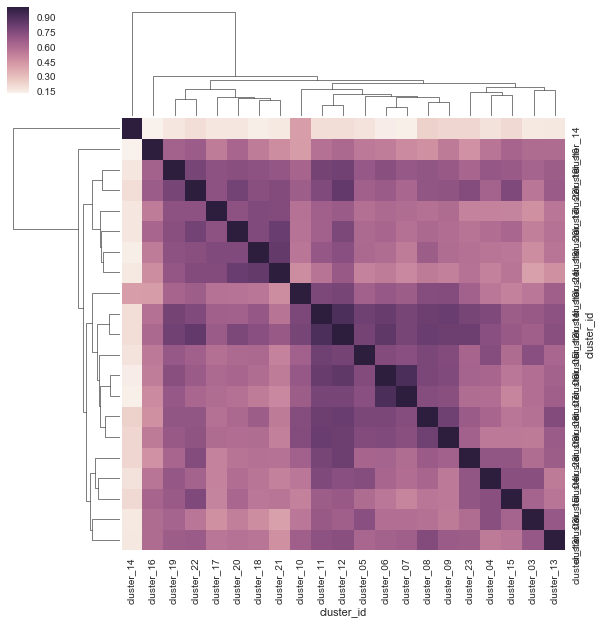

In [8]:
sns.clustermap(corr)

In [9]:
expression_log = np.log2(expression+1)
print(expression_log.shape)
expression_log.head()

(714, 614)


,1700025G04RIK,2610017I09RIK,2900011O08RIK,4833424O15RIK,4930447C04RIK,6330403K07RIK,6430548M08RIK,8430419L09RIK,A030009H04RIK,A830010M20RIK,...,YWHAG,YWHAH,ZCCHC12,ZCCHC18,ZEB2,ZFHX3,ZFP804A,ZMAT4,ZWINT,ZYX
r1_GGGTGTCAGTGG,1.000000,0.0,4.584963,2.321928,2.000000,3.000000,3.459432,2.321928,2.000000,2.321928,...,3.000000,2.321928,0.0,2.584963,1.584963,3.000000,0.000000,2.000000,2.807355,0.000000
r1_GTTTATATGCGC,2.584963,0.0,3.321928,2.000000,1.000000,2.321928,2.321928,2.807355,3.321928,2.321928,...,2.000000,2.584963,1.0,3.169925,3.584963,2.321928,1.584963,2.000000,3.169925,0.000000
r1_TCTTCACTGGCT,2.584963,0.0,2.807355,0.000000,2.321928,2.584963,3.000000,0.000000,2.000000,3.321928,...,3.000000,2.584963,1.0,2.321928,2.000000,0.000000,2.000000,2.000000,3.584963,1.584963
r1_TCATTTAGTCGA,1.584963,1.0,3.906891,4.087463,0.000000,3.169925,0.000000,0.000000,2.000000,0.000000,...,3.584963,2.321928,1.0,2.584963,3.807355,0.000000,0.000000,0.000000,2.807355,0.000000
r1_GTCTATTCGGTT,0.000000,0.0,3.584963,4.321928,0.000000,1.584963,3.807355,1.584963,1.000000,1.000000,...,1.584963,3.459432,1.0,1.584963,1.000000,0.000000,1.000000,1.584963,1.000000,0.000000


In [10]:
expression_log_mean = expression_log.groupby(cluster_names, axis=0).mean()
print(expression_log_mean.shape)
expression_log_mean.head()

(21, 614)


,1700025G04RIK,2610017I09RIK,2900011O08RIK,4833424O15RIK,4930447C04RIK,6330403K07RIK,6430548M08RIK,8430419L09RIK,A030009H04RIK,A830010M20RIK,...,YWHAG,YWHAH,ZCCHC12,ZCCHC18,ZEB2,ZFHX3,ZFP804A,ZMAT4,ZWINT,ZYX
cluster_id,,,,,,,,,,,,,,,,,,,,,
cluster_03,0.761215,0.0,0.651404,0.000000,0.372553,0.058749,1.012408,0.172386,0.600786,1.076626,...,0.749521,1.068634,0.000000,0.710153,0.433564,0.584822,0.000000,1.044052,0.840946,0.240567
cluster_04,0.352689,0.0,0.750376,0.846154,1.094525,0.538462,0.454376,0.153846,0.673453,0.531299,...,0.782302,1.075175,0.000000,1.044997,0.243840,0.852063,0.000000,0.506536,0.564604,0.153846
cluster_05,0.453885,0.0,1.881549,0.620551,0.582881,0.864926,1.086153,0.720960,1.395166,0.582881,...,0.421387,0.718045,0.222222,0.829156,1.566557,0.799930,0.088053,0.852214,1.239841,0.088053
cluster_06,0.446545,0.0,2.244249,0.587185,0.408808,0.961334,1.452744,0.426355,1.423102,0.681609,...,0.936275,0.897997,0.047619,0.763346,0.075474,0.929037,0.000000,0.398926,0.990051,0.023810
cluster_07,0.735147,0.0,2.048786,0.652297,0.280925,0.402868,1.601280,0.456700,1.277725,0.541938,...,1.057767,0.920783,0.037037,0.720528,0.118376,0.394430,0.092593,0.618827,1.355065,0.055556


In [16]:
from scipy.cluster.hierarchy import dendrogram

In [12]:
import fastcluster
import polo

distances = fastcluster.pdist(expression_log_mean, metric='euclidean')

linkage = fastcluster.linkage(distances, method='ward')
linkage.shape

(20, 4)

In [13]:
dendrogram(linkage);

NameError: name 'dendrogram' is not defined

In [14]:
olo_linkage = polo.optimal_leaf_ordering(linkage, distances)
olo_linkage.shape

(20, 4)

In [15]:
from scipy.cluster import hierarchy

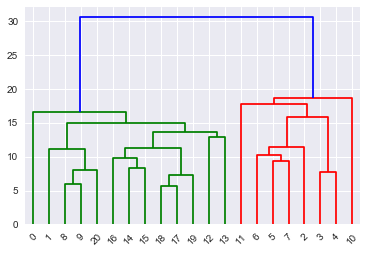

In [17]:
dendrogram(olo_linkage);

In [18]:
expression_log_mean.shape

(21, 614)

/Users/olgabot/anaconda3/envs/macosko2015-env/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


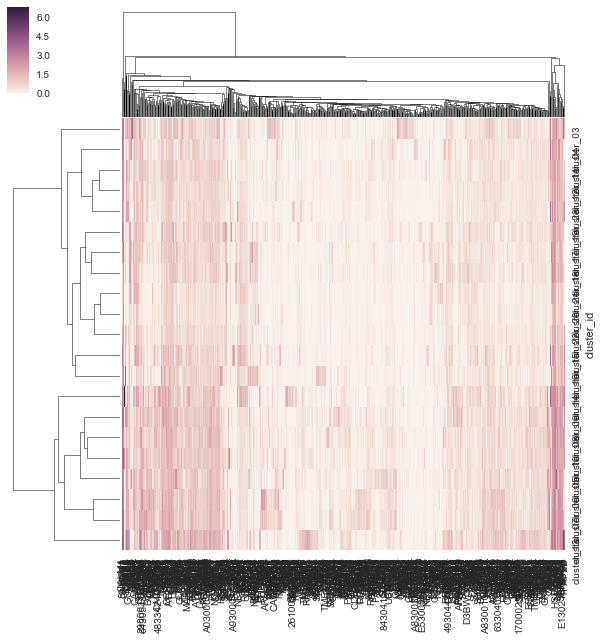

In [19]:
sns.clustermap(expression_log_mean, row_linkage=olo_linkage)

In [20]:
olo_linkage

array([[ 18.        ,  17.        ,   5.7423853 ,   2.        ],
       [  8.        ,   9.        ,   6.00740907,   2.        ],
       [ 21.        ,  19.        ,   7.2527819 ,   3.        ],
       [  3.        ,   4.        ,   7.66982925,   2.        ],
       [ 22.        ,  20.        ,   8.06800235,   3.        ],
       [ 14.        ,  15.        ,   8.36646439,   2.        ],
       [  5.        ,   7.        ,   9.34152688,   2.        ],
       [ 16.        ,  26.        ,   9.84292001,   3.        ],
       [  6.        ,  27.        ,  10.26315893,   3.        ],
       [  1.        ,  25.        ,  11.18842383,   4.        ],
       [ 28.        ,  23.        ,  11.27075963,   6.        ],
       [ 29.        ,   2.        ,  11.40665472,   4.        ],
       [ 12.        ,  13.        ,  12.86798028,   2.        ],
       [ 31.        ,  33.        ,  13.56710103,   8.        ],
       [ 30.        ,  34.        ,  14.91715178,  12.        ],
       [ 32.        ,  24

## Figure 5a

In [71]:
def upperizer(genes):
    return [x.upper() for x in genes]

In [72]:
figure5a_genes = ['Nrxn2', 'Atp1b1', 'Pax6', 'Slc32a1', 'Slc6a1', 'Elavl3']
figure5a_genes_upper = upperizer(figure5a_genes)
figure5a_genes_upper

['NRXN2', 'ATP1B1', 'PAX6', 'SLC32A1', 'SLC6A1', 'ELAVL3']

In [73]:
import xarray as xr

In [74]:
netcdf = os.path.join(common.DATA_FOLDER, '05_make_rentina_subsets_for_teaching', 
                      'differential_clusters.netcdf')
diff_clusters = xr.open_dataset(netcdf)
diff_clusters

<xarray.Dataset>
Dimensions:        (cell_features: 1, cells: 6020, gene_features: 39, gene_symbol: 1339, genes: 1339)
Coordinates:
  * cells          (cells) |S15 b'r1_GGCCGCAGTCCG' b'r1_CTTGTGCGGGAA' ...
    genes          (gene_symbol) |S13 b'1500015O10RIK' b'1500016L03RIK' ...
Dimensions without coordinates: cell_features, gene_features, gene_symbol
Data variables:
    expression     (cells, genes) int32 0 0 5 4 7 28 5 0 33 0 1 5 19 7 0 26 ...
    cell_metadata  (cells, cell_features) |S10 b'cluster_02' b'cluster_02' ...
    gene_metadata  (genes, gene_features) bool False False False False False ...

In [83]:
# # figure5a_expression = diff_clusters.expression.loc[:, figure5a_genes_upper]
# figure5a_expression = diff_clusters.expression.sel_points(genes=figure5a_genes_upper)
# print(figure5a_expression.shape)
# figure5a_expression.head()

In [85]:
%pdb

Automatic pdb calling has been turned OFF


In [86]:
diff_clusters.loc[dict(cells=b'r1_CTTGTGCGGGAA')]

<xarray.Dataset>
Dimensions:        (cell_features: 1, gene_features: 39, gene_symbol: 1339, genes: 1339)
Coordinates:
    cells          |S15 b'r1_CTTGTGCGGGAA'
    genes          (gene_symbol) |S13 b'1500015O10RIK' b'1500016L03RIK' ...
Dimensions without coordinates: cell_features, gene_features, gene_symbol
Data variables:
    expression     (genes) int32 0 0 9 4 4 33 4 0 43 0 0 1 16 12 0 15 0 0 4 ...
    cell_metadata  (cell_features) |S10 b'cluster_02'
    gene_metadata  (genes, gene_features) bool False False False False False ...

In [89]:
diff_clusters.sel(gene_symbol=dict(genes='PAX6'))

IndexError: arrays used as indices must be of integer (or boolean) type

In [38]:
figure5a_expression_mean = \
    figure5a_expression.groupby(cluster_names, axis=0).mean()
print(figure5a_expression_mean.shape)
figure5a_expression_mean.head()

(21, 6)


,NRXN2,ATP1B1,PAX6,SLC32A1,SLC6A1,ELAVL3
cluster_id,,,,,,
cluster_03,1.409091,10.772727,1.454545,1.568182,2.090909,1.477273
cluster_04,1.846154,2.230769,5.692308,0.615385,1.000000,0.846154
cluster_05,3.222222,10.111111,4.888889,1.944444,3.944444,1.888889
cluster_06,5.666667,8.619048,6.404762,2.119048,4.238095,2.214286
cluster_07,4.814815,8.740741,6.296296,1.981481,3.759259,2.703704


In [41]:
figure5a_expression_tidy = figure5a_expression_mean.unstack().reset_index()
figure5a_expression_tidy = figure5a_expression_tidy.rename(
    columns={'level_0': 'gene_symbol', 'level_1': 'barcode', 0: 'expression'})
figure5a_expression_tidy['log_expression'] = np.log2(figure5a_expression_tidy['expression'] + 1)
print(figure5a_expression_tidy.shape)
# figure5a_expression_tidy = figure5a_expression_tidy.join(cluster_names, on='barcode')
figure5a_expression_tidy.head()

(126, 4)


,gene_symbol,cluster_id,expression,log_expression
0,NRXN2,cluster_03,1.409091,1.268489
1,NRXN2,cluster_04,1.846154,1.509014
2,NRXN2,cluster_05,3.222222,2.078003
3,NRXN2,cluster_06,5.666667,2.736966
4,NRXN2,cluster_07,4.814815,2.539733


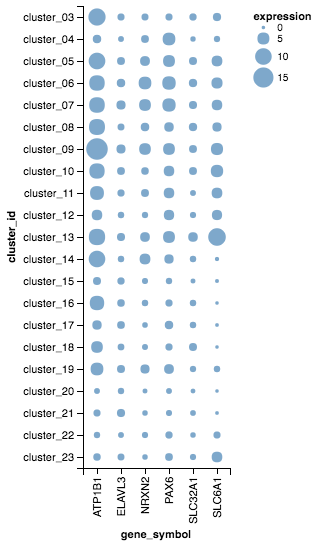

In [42]:
import altair

altair.Chart(figure5a_expression_tidy).mark_circle().encode(
    size='expression', x=altair.X('gene_symbol'), y=altair.Y('cluster_id'))

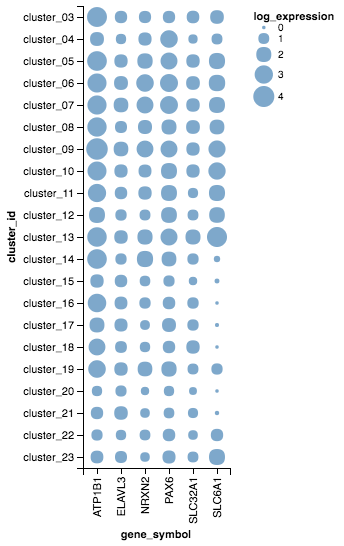

In [43]:
import altair

altair.Chart(figure5a_expression_tidy).mark_circle().encode(
    size='log_expression', x=altair.X('gene_symbol'), y=altair.Y('cluster_id'))

In [39]:
figure5a_expression_median = figure5a_expression.groupby(cluster_names, axis=1).median()

In [30]:
figure5a_expression_mean = figure5a_expression_tidy.groupby('cluster_id').mean()
figure5a_expression_mean.head()

,expression,log_expression
cluster_id,,
cluster_03,3.128788,1.312279
cluster_04,2.038462,1.200985
cluster_05,4.333333,1.829966
cluster_06,4.876984,2.121230
cluster_07,4.716049,2.057740


Try the same thing, but with:

- Mean within clusters, log expression
- **Median** within clusters, raw counts
- **Median** within clusters, log expression

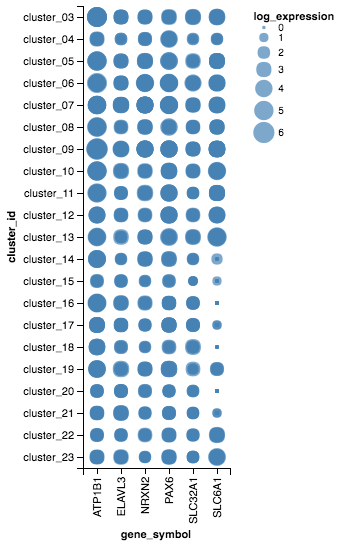

In [28]:
altair.Chart(figure5a_expression_tidy).mark_circle().encode(
    size='log_expression', x=altair.X('gene_symbol'), y=altair.Y('cluster_id'))

## Figure 5b

In [90]:
figure5b_genes = ['Chat', "Gad1", 'Gad2', 'Slc17a8', 'Slc6a9', 'Gjd2', 'Gjd2', 'Ebf3']
figure5b_genes_upper = upperizer(figure5b_genes)
figure5b_genes_upper

['CHAT', 'GAD1', 'GAD2', 'SLC17A8', 'SLC6A9', 'GJD2', 'GJD2', 'EBF3']

In [6]:
figure5b_expression = expression[figure5b_genes_upper]
figure5b_expression.head()

,CHAT,GAD1,GAD2,SLC17A8,SLC6A9,GJD2,GJD2,EBF3
r1_GGGTGTCAGTGG,0,8,16,0,0,2,2,0
r1_GTTTATATGCGC,0,10,6,0,1,0,0,0
r1_TCTTCACTGGCT,0,14,6,0,0,0,0,0
r1_TCATTTAGTCGA,0,6,1,0,0,1,1,0
r1_GTCTATTCGGTT,0,7,16,0,0,0,0,0


In [20]:
figure5b_tidy = pd.melt(figure5b_expression.reset_index(), id_vars='index', 
               value_name='expression', var_name='gene_symbol')
figure5b_tidy = figure5b_tidy.rename(columns={'index': 'barcode'})
print(figure5b_tidy.shape)
figure5b_tidy.head()

(5712, 3)


,barcode,gene_symbol,expression
0,r1_GGGTGTCAGTGG,CHAT,0
1,r1_GTTTATATGCGC,CHAT,0
2,r1_TCTTCACTGGCT,CHAT,0
3,r1_TCATTTAGTCGA,CHAT,0
4,r1_GTCTATTCGGTT,CHAT,0


In [22]:
tidy_clusters = tidy.join(cluster_names, on='barcode')
print(tidy_clusters.shape)
tidy_clusters.head()

(5712, 4)


,barcode,gene_symbol,expression,cluster_id
0,r1_GGGTGTCAGTGG,CHAT,0,cluster_06
1,r1_GTTTATATGCGC,CHAT,0,cluster_05
2,r1_TCTTCACTGGCT,CHAT,0,cluster_13
3,r1_TCATTTAGTCGA,CHAT,0,cluster_08
4,r1_GTCTATTCGGTT,CHAT,0,cluster_10


In [ ]:
# for gene, df in tidy_clusters.groupby('gene_symbol'):
#     fig, ax = plt.subplots()
#     sns.violinplot(x)

In [36]:
sns.set(context='paper', style='whitegrid')

In [43]:
sns.violinplot??

In [48]:
clusters = tidy_clusters['cluster_id'].unique()
clusters.sort()
clusters

array(['cluster_03', 'cluster_04', 'cluster_05', 'cluster_06',
       'cluster_07', 'cluster_08', 'cluster_09', 'cluster_10',
       'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14',
       'cluster_15', 'cluster_16', 'cluster_17', 'cluster_18',
       'cluster_19', 'cluster_20', 'cluster_21', 'cluster_22', 'cluster_23'], dtype=object)

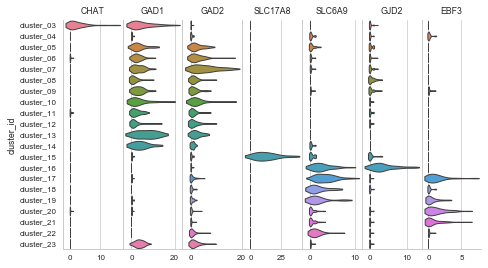

In [52]:
g = sns.FacetGrid(tidy_clusters, col='gene_symbol', size=4, aspect=0.25,
                  gridspec_kws=dict(hspace=0, wspace=0), sharex=False)
g.map(sns.violinplot, 'expression', 'cluster_id', orient='h', scale='width', 
      linewidth=1, order=clusters, palette='husl', inner=None, cut=True)
g.set(xlabel='')
g.set_titles('{col_name}')


## Don't see bimodality .. try log2

In [53]:
tidy_clusters['log_expression'] = np.log2(tidy_clusters['expression'] + 1)

In [90]:
g = sns.FacetGrid(tidy_clusters, col='gene_symbol', size=4, aspect=0.25,
                  gridspec_kws=dict(hspace=0, wspace=0), sharex=False)
g.map(sns.violinplot, 'log_expression', 'cluster_id', orient='h', 
      scale='width', linewidth=1, order=clusters, palette='husl', 
      inner=None, cut=True)
g.set(xlabel='', xticks=[])
g.set_titles('{col_name}')
for ax in g.axes.flat:
    xmin, xmax = ax.get_xlim()
    ax.set(xlim=(0, xmax))
    
g.savefig(os.path.join(figure_folder, 'figure5b.pdf'))

NameError: name 'tidy_clusters' is not defined

## Figure 5c - as an exercise

In [65]:
figure5c_genes = ['Gng7', 'Gbx2', 'Tpbg', 'Slitrk6', 'Maf', 'Tac2', 'Loxl2', 'Vip', 'Glra1',
                  'Igfbp5', 'Pdgfra', 'Slc35d3', 'Car3', 'Fgf1', 'Igf1', 'Col12a1', 'Ptgds',
                  'Ppp1r17', 'Cck', 'Shisa9', 'Pou3f3']
figure5c_genes_upper = figure5c_genes
figure53_expression = expression[figure5c_genes_upper]

KeyError: "['Gng7' 'Gbx2' 'Tpbg' 'Slitrk6' 'Maf' 'Tac2' 'Loxl2' 'Vip' 'Glra1' 'Igfbp5'\n 'Pdgfra' 'Slc35d3' 'Car3' 'Fgf1' 'Igf1' 'Col12a1' 'Ptgds' 'Ppp1r17' 'Cck'\n 'Shisa9' 'Pou3f3'] not in index"

In [ ]:
g = sns.FacetGrid(tidy_clusters, col='gene_symbol', size=4, aspect=0.25,
                  gridspec_kws=dict(hspace=0, wspace=0), sharex=False)
g.map(sns.violinplot, 'log_expression', 'cluster_id', orient='h', scale='width', 
      linewidth=1, order=clusters, palette='husl', inner=None, cut=True)
g.set(xlabel='', xticks=[])
g.set_titles('{col_name}')
for ax in g.axes.flat:
    xmin, xmax = ax.get_xlim()
    ax.set(xlim=(0, xmax))

### Robust PCA on Figure 5c

In [57]:
import sys
sys.path.append('/Users/olgabot/code/robust-pca/')

import r_pca

In [60]:
amacrine_rpca.fit??

In [61]:
amacrine_rpca = r_pca.R_pca(expression.as_matrix())
lowrank, sparse = amacrine_rpca.fit()

iteration: 1, error: 89719.33798885415
iteration: 100, error: 0.6330691800608881
iteration: 137, error: 0.2786376210941671


In [62]:
def tidify(data2d):
    data_tidy = pd.melt(data2d.reset_index(), id_vars='index', 
               value_name='expression', var_name='gene_symbol')
    data_tidy = data_tidy.rename(columns={'index': 'barcode'})
    return data_tidy

In [64]:
lowrank_df = pd.DataFrame(lowrank, index=expression.index, columns=expression.columns)
print(lowrank_df.shape)
lowrank_df.head()

(714, 614)


,1700025G04RIK,2610017I09RIK,2900011O08RIK,4833424O15RIK,4930447C04RIK,6330403K07RIK,6430548M08RIK,8430419L09RIK,A030009H04RIK,A830010M20RIK,...,YWHAG,YWHAH,ZCCHC12,ZCCHC18,ZEB2,ZFHX3,ZFP804A,ZMAT4,ZWINT,ZYX
r1_GGGTGTCAGTGG,1.472442,0.002982,11.767506,2.432508,0.990557,3.185586,8.062434,1.013607,5.784146,2.163623,...,4.844230,4.104141,0.007318,3.449245,1.587405,1.261298,0.034406,1.807231,6.000043,0.025569
r1_GTTTATATGCGC,1.495240,-0.000160,9.000085,2.703310,1.916876,3.345178,5.861134,0.949970,5.982487,2.134148,...,3.484867,4.722510,0.007416,4.371290,3.276108,1.005352,0.794364,1.852125,6.017725,-0.002815
r1_TCTTCACTGGCT,1.437269,-0.001336,6.315864,1.318977,3.269060,2.105499,6.664976,0.107632,4.491492,1.449185,...,5.587380,4.999817,0.002860,4.000011,3.000065,0.086543,0.943367,0.871208,6.944142,0.118463
r1_TCATTTAGTCGA,1.126102,-0.006785,7.032396,2.193180,2.139370,3.064916,4.405724,0.488815,3.968338,0.903634,...,4.546031,4.312819,0.010187,4.061080,2.929740,0.079967,0.486353,0.961568,5.880449,-0.012339
r1_GTCTATTCGGTT,0.989302,0.005142,7.100116,2.701279,0.733686,2.593193,6.398625,0.418440,4.098714,1.004176,...,3.302288,4.136620,0.005958,2.857335,1.584070,0.586255,0.392932,0.932113,3.993389,-0.000792


In [ ]:
lowrank_5c = lowrank_df[]